In [1]:
import pynbody
import pynbody.plot.sph as sph
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import sys
import glob
import os
params = {"font.family":"serif","mathtext.fontset":"stix"}
mpl.rcParams.update(params)

In [3]:
kpc_cgs= 3.08567758e21
G_cgs  = 6.67e-8
Mo_cgs = 1.99e33
umass_GizToGas = 1.  #1e9Mo
umass = 1.0 #* umass_GizToGas
udist = 1.0  #kpc
uvel  = np.sqrt( G_cgs * umass * Mo_cgs / (udist * kpc_cgs) )/1e5
udens = umass * Mo_cgs / (udist * kpc_cgs)**3.
utime = np.sqrt(1./(udens * G_cgs))
sec2myr = 60.*60.*24.*365.*1e6

In [4]:
#some plotting limits:
cgas = 'seismic'
cstr = 'seismic'
vminG = 2e-5
vmaxG = 2e-2
vminS = 1e-4
vmaxS = 1e0
xD    = 22  #box side half-length
res1  = 500 #resolution of images

In [7]:
#read in file
filenom = '../data/GLM.00310'
print('Reading in:',filenom)
dno  = filenom.split('.')[-1]
s    = pynbody.load(filenom)
s.physical_units()
t_now   =  s.properties['time'].in_units('Gyr')
timestr = str( np.round(float(t_now),2) )

Reading in: ../data/GLM.00310


/home/amigos/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/pynbody/snapshot/tipsy.py:130: RuntimeWarning: No readable param file in the run directory or parent directory: using defaults.
  "No readable param file in the run directory or parent directory: using defaults.", RuntimeWarning)


In [9]:
#Put CoM of whole system in the middle
pynbody.analysis.angmom.faceon(s)
#Rotate if we want, you can easily add new rotations in here to align with specific Lz if you like.
s.rotate_z(270)
#bin stuff up radially for profiles:
p  = pynbody.analysis.profile.Profile(s,max='60 kpc',min='0.1 kpc',type='log',nbins=100)
pd = pynbody.analysis.profile.Profile(s.dm,max='60 kpc',min='0.1 kpc',type='log',nbins=100)
pg = pynbody.analysis.profile.Profile(s.gas,max='60 kpc',min='0.1 kpc',type='log',nbins=100)
ps = pynbody.analysis.profile.Profile(s.stars,max='60 kpc',min='0.1 kpc',type='log',nbins=100)

/home/amigos/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/matplotlib/contour.py:1230: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


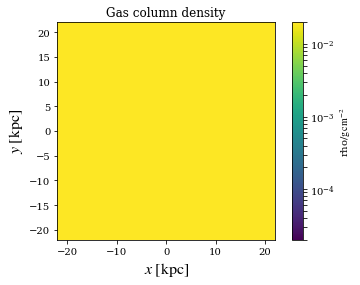

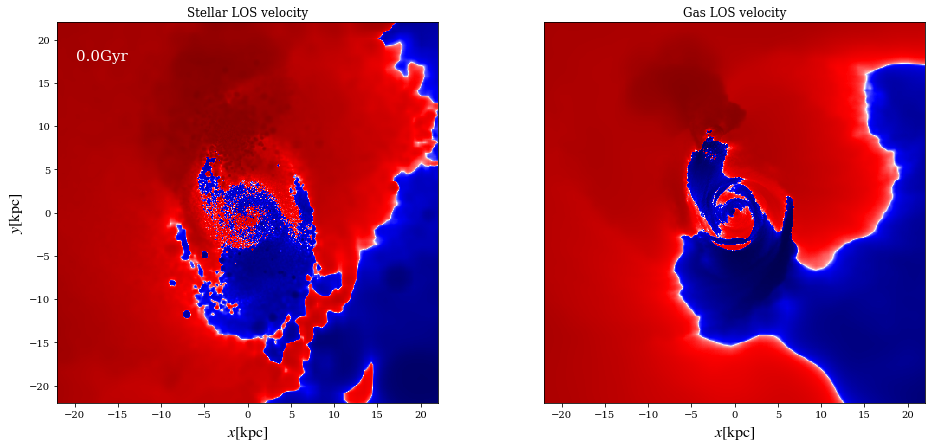

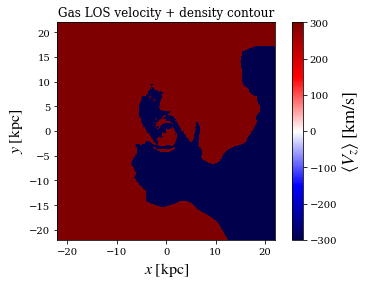

In [10]:
#make a gas integrated column density plot (correctly uses smoothing lengths)
AP   = plt.figure(1)
Ax1  = AP.add_subplot(111)
Ncol = sph.image(s.gas, qty='rho',width='50 kpc',cmap='viridis',units='g cm^-2',subplot=Ax1,show_cbar = True,resolution=res1,vmin=vminG,vmax=vmaxG)
Ax1.set_xlabel('$x \\; {\\rm [kpc]}$',fontsize=16)
Ax1.set_ylabel('$y \\; {\\rm [kpc]}$',fontsize=16)
Ax1.set_xlim(-xD,xD)
Ax1.set_ylim(-xD,xD)
Ax1.set_title('Gas column density')
# AP.savefig('Ncol_'+dno+'.png',dpi=100)

#density weight the vertical (line of sight) velocity data:
f, axs = plt.subplots(1,2,figsize=(16,7),num=2)
Vs = sph.image(s.star,qty='vz',width='50 kpc',cmap=cstr,units='km s^-1', subplot=axs[0],show_cbar = False,resolution=res1,av_z='rho')
Vg = sph.image(s.gas, qty='vz',width='50 kpc',cmap=cgas,units='km  s^-1',subplot=axs[1],show_cbar = False,resolution=res1,av_z='rho')
axs[0].set_ylabel('$y {\\rm [kpc]}$',fontsize=16)  
axs[0].set_xlabel('$x {\\rm [kpc]}$',fontsize=16)  
axs[1].set_xlabel('$x {\\rm [kpc]}$',fontsize=16)  
axs[1].set_ylabel(' ')  
axs[1].set_yticklabels([])
axs[1].set_yticks([])
axs[1].set_xlim(-xD,xD)
axs[0].set_xlim(-xD,xD)
axs[1].set_ylim(-xD,xD)
axs[0].set_ylim(-xD,xD)
axs[0].set_title('Stellar LOS velocity')
axs[1].set_title('Gas LOS velocity')
axs[0].annotate(timestr+'Gyr',xy=(0.05,0.9),xycoords='axes fraction',color='white',fontsize=15)

#add <vz> as a contour to gas map, same as Vg except with contour overlay and different limits
A = plt.figure(3)
Ax3 = A.add_subplot(111,aspect='equal')
im = Ax3.imshow(Vg,cmap='seismic',extent=(-25,25,-25,25),vmin=-300,vmax=300,origin='lower')
Ax3.contour(Ncol,colors='black',extent=(-25,25,-25,25),levels = (3e-4,2e-3))
cb = A.colorbar(im)
cb.set_label('$\\langle V_z \\rangle \\; {\\rm [km/s]}$', fontsize=18)
Ax3.set_xlabel('$x \\; {\\rm [kpc]}$',fontsize=16)
Ax3.set_ylabel('$y \\; {\\rm [kpc]}$',fontsize=16)
Ax3.set_xlim(-xD,xD)
Ax3.set_ylim(-xD,xD)
Ax3.set_title('Gas LOS velocity + density contour')
# A.savefig('VlosNcol_'+dno+'.png',dpi=100)

plt.show()